---
# <div align="center"><font color='green'> COSC 2673/2793 | Machine Learning  </font></div>
## <div align="center"> <font color='green'>Assignment 2: Machine Learning Project</font></div><div align="center"> <font color='green'>Shape classification</font></div>
---



# Import and read data

In [1]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import tensorflow as tf
import shutil
import joblib

from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, f1_score,precision_score, recall_score,confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm

from imghdr import what

from skimage.transform import resize
from skimage.io import imread

from tabulate import tabulate

Let's import the data.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The path must be modified using the path where your trafficsigns_dataset.zip is.

In [ ]:
!cp /content/drive/'My Drive'/Assignment2_CML/Assignment2_Machine_Learning/trafficsigns_dataset.zip .

Unzip the directory with the images dataset

In [ ]:
# path to zip
zip_file_path = "./trafficsigns_dataset.zip"

# path to repertory where images will be extracted
extracted_dir = "./"

# zip extraction
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# remove what we do not need
!rm -r __MACOSX/
!rm -r sample_data/

data_dir = extracted_dir + "/trafficsigns_dataset"

Let's define some variables.

In [ ]:
label_names = {'diamond' : 0, 'hex' : 1, 'round' : 2, 'square' : 3, 'triangle' : 4}

#Load models

Let's load the models made in this notebook.

In [ ]:
!cp -r /content/drive/'My Drive'/Assignment2_CML/Assignment2_Machine_Learning/shape_model .
!cp -r /content/drive/'My Drive'/Assignment2_CML/Assignment2_Machine_Learning/shape_model_VGG_1 .
!cp -r/content/drive/'My Drive'/Assignment2_CML/Assignment2_Machine_Learning/shape_model_VGG_2 .
!cp -r /content/drive/'My Drive'/Assignment2_CML/Assignment2_Machine_Learning/shape_model_VGG_3 .
!cp -r /content/drive/'My Drive'/Assignment2_CML/Assignment2_Machine_Learning/shape_model_leNet .

model=load_model("/content/drive/My Drive/Assignment2_CML/Assignment2_Machine_Learning/shape_model")
model_VGG_1=load_model("/content/drive/My Drive/Assignment2_CML/Assignment2_Machine_Learning/shape_model_VGG_1")
model_VGG_2=load_model("/content/drive/My Drive/Assignment2_CML/Assignment2_Machine_Learning/shape_model_VGG_2")
model_VGG_3=load_model("/content/drive/My Drive/Assignment2_CML/Assignment2_Machine_Learning/shape_model_VGG_3")
model_leNet=load_model("/content/drive/My Drive/Assignment2_CML/Assignment2_Machine_Learning/shape_model_leNet")
model_svm = joblib.load('/content/drive/My Drive/Assignment2_CML/Assignment2_Machine_Learning/shape_model_svm.joblib')
svc=joblib.load('/content/drive/My Drive/Assignment2_CML/Assignment2_Machine_Learning/shape_model_svm.joblib')

# Create dataframes

##For Neural Networks, VGG and Le Net Models

In [6]:
files_names = []
shapes_list = []
types_list = []

for shape in os.listdir(data_dir):
  if((shape!="Readme.txt") and (shape!=".DS_Store" )):
    shape_path = os.path.join(data_dir, shape)
    if os.path.isdir(shape_path):
      for type in os.listdir(shape_path):
        if((type!="Readme.txt") and (type!=".DS_Store" )):
          shape_type_path = os.path.join(shape_path, type)
          if os.path.isdir(shape_type_path):
            for image in os.listdir(shape_type_path):
              if((image!="Readme.txt") and (image!=".DS_Store" )):
                files_names.append(image)
                types_list.append(type)
                shapes_list.append(shape)


# creation of a new column with shapes/types encoded
from sklearn.preprocessing import LabelEncoder
shape_encoder = LabelEncoder()
type_encoder = LabelEncoder()
shapes_int = shape_encoder.fit_transform(shapes_list)
types_int = type_encoder.fit_transform(types_list)

shape_values = shape_encoder.classes_
type_values = type_encoder.classes_

# Display the integer associated to the value
for integer, value in enumerate(shape_values):
    print(f"{integer}: {value}")
print('\n')
for integer, value in enumerate(type_values):
    print(f"{integer}: {value}")

# shapes
# pandas dataframe creation
df1 = pd.DataFrame({"File Name": files_names, "Shape": shapes_list, "ID shape": shapes_int})
# write in CSV
df1.to_csv("signs_shape.csv", index=False)

# types
# pandas dataframe creation
df2 = pd.DataFrame({"File Name": files_names, "Type": types_list, "ID type": types_int})

# write in CSV
df2.to_csv("signs_type.csv", index=False)



0: diamond
1: hex
2: round
3: square
4: triangle


0: bicycle
1: continue
2: crossing
3: giveway
4: laneend
5: limitedtraffic
6: noentry
7: noparking
8: parking
9: rightofway
10: roundabout
11: speed
12: stop
13: trafficdirective
14: traveldirection
15: warning


Let's create a dataframe with only the file name of the images and the numbers corresponding to the different shapes.

In [ ]:
!rm -r shapes_dataset
os.makedirs("./shapes_dataset/")

# Destination directory
destination = "./shapes_dataset/"

# Iterate over each shape directory
for shape in os.listdir(data_dir):
    shape_path = os.path.join(data_dir, shape)
    if os.path.isdir(shape_path):
        # Iterate over each type directory
        for type in os.listdir(shape_path):
           if((type!="Readme.txt") and (type!=".DS_Store" )):
              type_path = os.path.join(shape_path, type)
              if os.path.isdir(type_path):
                  # Iterate over each image file
                  for image in os.listdir(type_path):
                      image_path = os.path.join(type_path, image)
                      # Copy image to destination directory
                      shutil.copy(image_path, destination)

rm: cannot remove 'shapes_dataset': No such file or directory


In [ ]:
df3 = pd.DataFrame({"File Name": files_names, "ID shape": shapes_int})
df3.head(10)

,File Name,ID shape
0,00715_00002.png,1
1,01162_00000.png,1
2,01920_00000.png,1
3,01920_00001.png,1
4,01832_00002.png,1
5,01920_00002.png,1
6,01162_00001.png,1
7,01951_00000.png,1
8,01811_00001.png,1
9,00478_00002.png,1


##For the SVM model

In [7]:
destination_base = "./shapes/"

if not os.path.exists(destination_base):
    os.makedirs(destination_base)

for shape in os.listdir(data_dir):
    shape_path = os.path.join(data_dir, shape)
    if os.path.isdir(shape_path):
        destination_shape = os.path.join(destination_base, shape)
        if not os.path.exists(destination_shape):
            os.makedirs(destination_shape)
        for type_dir in os.listdir(shape_path):
          type_path = os.path.join(shape_path, type_dir)
          if os.path.isdir(type_path):
                  for image in os.listdir(type_path):
                      image_path = os.path.join(type_path, image)
                      if what(image_path) is not None:
                        shutil.copy(image_path, destination_shape)


In [8]:
Categories=['diamond','hex','round','square','triangle']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='shapes/'

for i in Categories:
	path=os.path.join(datadir,i)
	for img in os.listdir(path):
		img_array=imread(os.path.join(path,img))
		img_resized=resize(img_array,(28,28,3))
		flat_data_arr.append(img_resized.flatten())
		target_arr.append(Categories.index(i))
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)


In [9]:
df_svm=pd.DataFrame(flat_data)
df_svm['Target']=target
df_svm.shape
print(df_svm)

             0         1         2         3         4         5         6  \
0     0.760784  0.760784  0.760784  0.674510  0.674510  0.674510  0.725490   
1     0.129412  0.129412  0.129412  0.137255  0.137255  0.137255  0.137255   
2     0.258824  0.258824  0.258824  0.227451  0.227451  0.227451  0.219608   
3     0.282353  0.282353  0.282353  0.278431  0.278431  0.278431  0.278431   
4     0.647059  0.647059  0.647059  0.584314  0.584314  0.584314  0.388235   
...        ...       ...       ...       ...       ...       ...       ...   
3636  0.533333  0.533333  0.533333  0.498039  0.498039  0.498039  0.403922   
3637  0.000000  0.000000  0.000000  0.007843  0.007843  0.007843  0.000000   
3638  0.184314  0.184314  0.184314  0.188235  0.188235  0.188235  0.196078   
3639  0.466667  0.466667  0.466667  0.454902  0.454902  0.454902  0.447059   
3640  0.215686  0.215686  0.215686  0.227451  0.227451  0.227451  0.207843   

             7         8         9  ...      2343      2344    

#EDA

In [ ]:
# number of images

images_count = len(df1['File Name'])

print("Nb of images :", images_count, "\n")

Nb of images : 3699 



##EDA for shapes

Nb of shapes : 5  ( 5 -ary class)

Number of images in each shape class
Shape
round       1760
triangle     926
square       688
diamond      282
hex           43
Name: count, dtype: int64 



([0, 1, 2, 3, 4],
 [Text(0, 0, 'triangle'),
  Text(1, 0, 'diamond'),
  Text(2, 0, 'square'),
  Text(3, 0, 'hex'),
  Text(4, 0, 'round')])

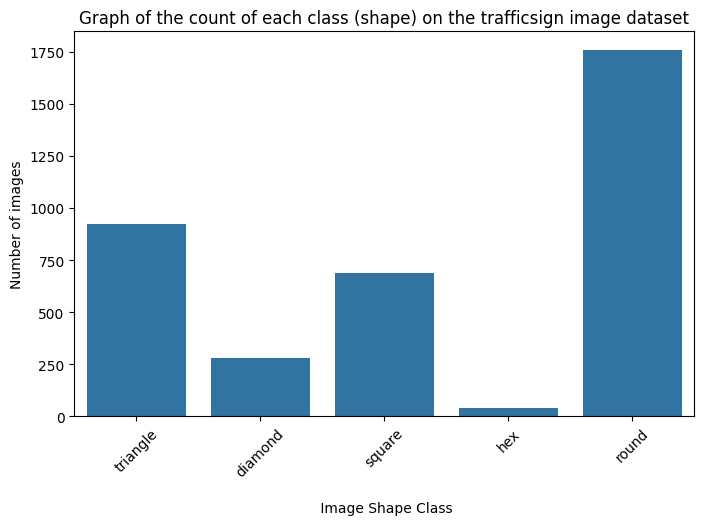

In [ ]:
# number of unique values
shape_unique_values = set(shapes_int)
shape_number = len(shape_unique_values)

print("Nb of shapes :", shape_number, " (", shape_number, "-ary class)\n")

print('Number of images in each shape class')
print(df1['Shape'].value_counts(), "\n")

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df1, x='Shape')
plt.title('Graph of the count of each class (shape) on the trafficsign image dataset')
plt.xlabel('\n Image Shape Class')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

> <span style="font-size:1em;">✔</span> **Observations:**

There are some label imbalance in our dataset and the task is multi-class classification (5-ary class).
A performance measure such as Accuracy can be inadequate for this task. We decide to use precision, recall, and F1-score instead.

Let's try to plot some of the images


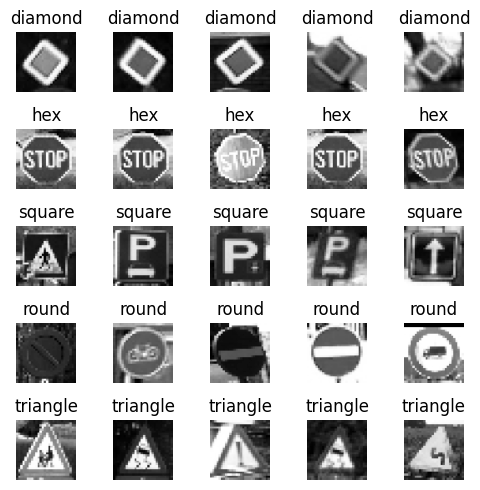

In [ ]:
# get the lists of images from diffent type directories
diamond_imgs = [ pic for pic in os.listdir('shapes/diamond') ]
hex_imgs = [ pic for pic in os.listdir('shapes/hex') ]
square_imgs = [ pic for pic in os.listdir('shapes/square') ]
round_imgs = [ pic for pic in os.listdir('shapes/round') ]
triangle_imgs = [ pic for pic in os.listdir('shapes/triangle') ]

# randomly select 5 of each
select_diamond = np.random.choice(diamond_imgs, 5, replace = False)
select_hex = np.random.choice(hex_imgs, 5, replace = False)
select_square = np.random.choice(square_imgs, 5, replace = False)
select_round = np.random.choice(round_imgs, 5, replace = False)
select_triangle = np.random.choice(triangle_imgs, 5, replace = False)

# plotting 5 x 5 image matrix
fig = plt.figure(figsize = (5,5))

for i in range(25):
    if i < 5:
        img = f'shapes/diamond/{select_diamond[i]}'
        label = 'diamond'
    elif i >= 5 and i < 10:
        img = f'shapes/hex/{select_hex[i-5]}'
        label = 'hex'
    elif i >= 10 and i < 15:
        img = f'shapes/square/{select_square[i-10]}'
        label = 'square'
    elif i >= 15 and i < 20:
        img = f'shapes/round/{select_round[i-15]}'
        label = 'round'
    elif i >= 20 and i < 25:
        img = f'shapes/triangle/{select_triangle[i-20]}'
        label = 'triangle'

    ax = fig.add_subplot(5, 5, i+1)

    to_plot = load_img(img, target_size = (100,100), color_mode='grayscale')
    plt.imshow(to_plot, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()


#Data splitting

Lets randomly split the data into train/val/test.

In [ ]:
data = df3

train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.25, random_state=42)

print("Train data : {}, Val Data: {}, Test Data: {}".format(train_data.shape[0], val_data.shape[0], test_data.shape[0]))

Train data : 2219, Val Data: 740, Test Data: 740


###Verifying the splits

Let's verify the splits.

####Displaying the arrays

In [ ]:
data.head(10)

,File Name,ID shape
0,00715_00002.png,1
1,01162_00000.png,1
2,01920_00000.png,1
3,01920_00001.png,1
4,01832_00002.png,1
5,01920_00002.png,1
6,01162_00001.png,1
7,01951_00000.png,1
8,01811_00001.png,1
9,00478_00002.png,1


In [ ]:
train_data.head(10)

,File Name,ID shape
3009,00959_00001.png,0
2409,00952_00001.png,2
966,00221_00001.png,4
1307,01399_00002.png,2
1798,00932_00002.png,2
3604,01784_00001.png,3
1854,01470_00000.png,2
789,00207_00000.png,4
812,00719_00000.png,4
1252,00662_00002.png,2


In [ ]:
test_data.head(10)

,File Name,ID shape
1042,00730_00002.png,2
2460,01280_00002.png,2
315,00057_00002.png,4
3523,01705_00002.png,3
811,00475_00000.png,4
321,01397_00001.png,4
402,00215_00002.png,4
744,01393_00000.png,4
2924,01935_00000.png,0
3238,01379_00001.png,3


In [ ]:
val_data.head(10)

,File Name,ID shape
2296,01502_00000.png,2
1394,00004_00002.png,2
3350,00154_00001.png,3
2180,00378_00000.png,2
603,01556_00000.png,4
3503,01289_00000.png,3
664,01447_00000.png,4
1212,00094_00002.png,2
692,00770_00000.png,4
2910,00943_00001.png,0


####Plotting the splits

#####Train data

Let's see some plots. The blue color represent the total data, the pink one is the training data.

([0, 1, 2, 3, 4],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

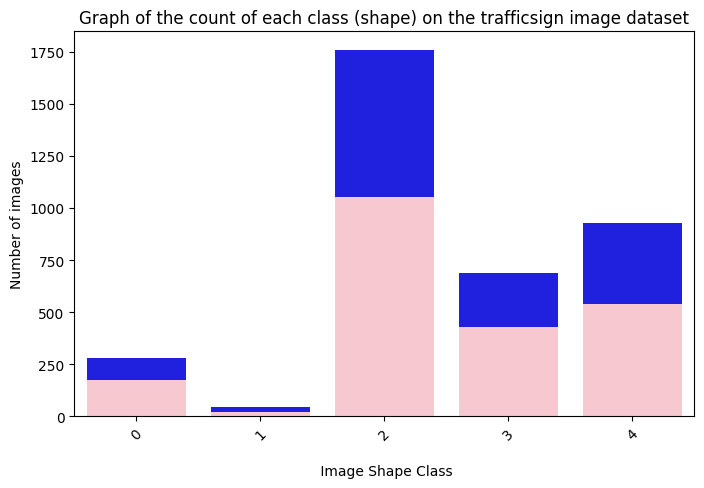

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df3, x='ID shape',color='blue')
sns.countplot(data=train_data, x='ID shape',color='pink')
plt.title('Graph of the count of each class (shape) on the trafficsign image dataset')
plt.xlabel('\n Image Shape Class')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

#####Test data

Let's see some plots. The blue color represent the total data, the orange one is the test data.

([0, 1, 2, 3, 4],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

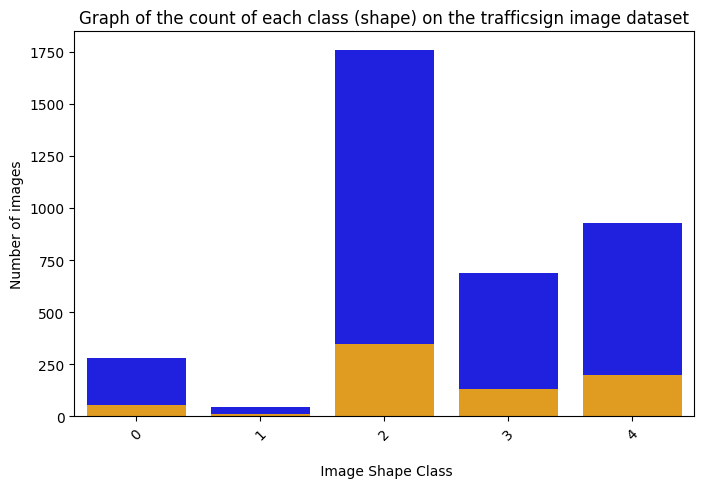

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df3, x='ID shape',color='blue')
sns.countplot(data=test_data, x='ID shape',color='orange')
plt.title('Graph of the count of each class (shape) on the trafficsign image dataset')
plt.xlabel('\n Image Shape Class')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

#####Validation data

Let's see some plots. The blue color represent the total data, the green one is the validation data.

([0, 1, 2, 3, 4],
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4')])

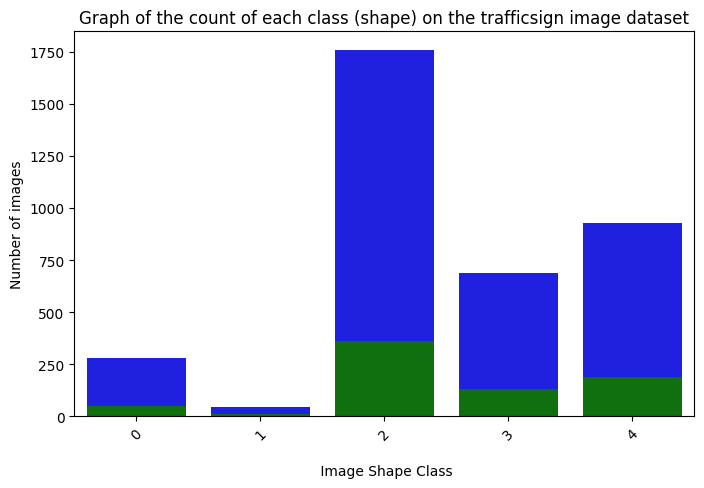

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=df3, x='ID shape',color='blue')
sns.countplot(data=val_data, x='ID shape',color='green')
plt.title('Graph of the count of each class (shape) on the trafficsign image dataset')
plt.xlabel('\n Image Shape Class')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

# Diagnostic tool

Let's write a function to plot the learning curves of a NN training process (taken from week 6 lab). This will be our diagnostic tool.

In [ ]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, label1, label2):
    plt.figure(figsize=(10,5))

    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(label1)
    plt.legend(['train', 'val'], loc='upper left')
    plt.ylim(0, 2.75)

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(label2)
    plt.legend(['train', 'val'], loc='upper left')
    plt.ylim(0, 1.1)

    plt.show()

#Base Model: 3 hidden-layers Neural Network

##Setup the layers

The initial dimensions are 28x28. There are 5 classes for shapes.

In [ ]:
INPUT_DIM = (28,28,3)
HIDDEN_LAYER_DIM = 256
OUTPUT_CLASSES = 5

Like in the lab, we use tensorflow and the `Sequential` API to build models as it is the simplest.

###Sequential API

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=INPUT_DIM),
    tf.keras.layers.Dense(HIDDEN_LAYER_DIM, activation='sigmoid'),
    tf.keras.layers.Dense(OUTPUT_CLASSES)
])

Neural network with three layers:
- The input layer (its dimension is the dimension of the image).
The function used transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 * 3 = 2352 pixels).
- One dense hidden-layer (its size is a hyper parameter that can be tuned)
- The output layer (5 neurons; each neuron correspond to a class/sign shape)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 2352)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               602368    
                                                                 
 dense_3 (Dense)             (None, 5)                 1285      
                                                                 
Total params: 603653 (2.30 MB)
Trainable params: 603653 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


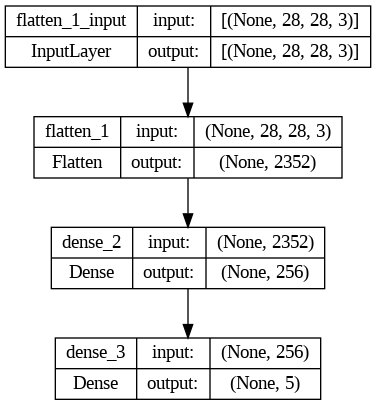

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

##Compile the model

In [ ]:
model.compile(optimizer='SGD',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['Recall','Precision'])

##Train the model

In [ ]:
train_data['ID shape'] = train_data['ID shape'].astype('str')
val_data['ID shape'] = val_data['ID shape'].astype('str')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 28

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 5 classes.
Found 740 validated image filenames belonging to 5 classes.


We began with 10 epochs. We slowly increased this value to 50 epochs (hyperparameter tuning). We had better results with 50 epochs.

In [ ]:
history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)

<ipython-input-53-243f5d5117d3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator, validation_data = validation_generator, epochs=50, verbose=0)


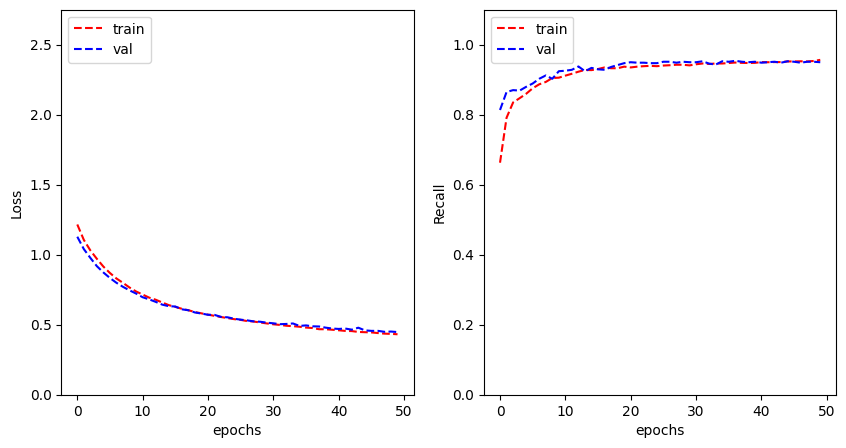

In [ ]:
plot_learning_curve(history.history['loss'], history.history['val_loss'],
                    history.history['recall'], history.history['val_recall'],
                    label1='Loss', label2='Recall')


##Testing the model

Let's use the test dataframe created previously:

In [ ]:
test_data['ID shape'] = test_data['ID shape'].astype('str')

test_datagen_model = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator_model = test_datagen_model.flow_from_dataframe(
        dataframe=test_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 740 validated image filenames belonging to 5 classes.


In [ ]:
evaluation_results_model=model.evaluate(test_generator_model)

740/740 [==============================] - 3s 4ms/step - loss: 0.4744 - recall: 0.9486 - precision: 0.6104


##Plotting some results

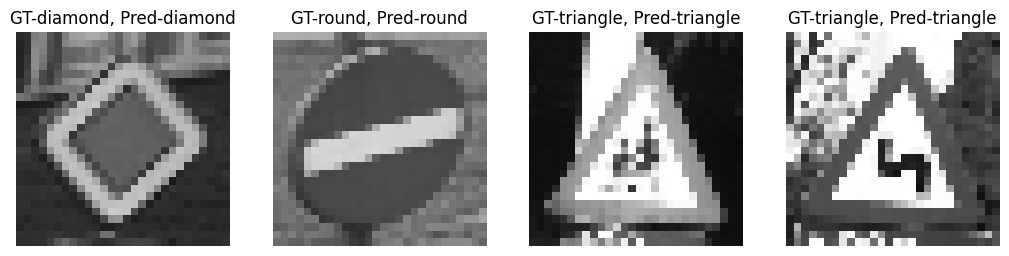

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16,4))
batches = 0
for x,y in test_generator_model:
        batches = batches + 1
        y_hat = model.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

##Predict all the test set and add it to the test_data dataframe

In [ ]:
label_namess=['diamond', 'hex', 'round', 'square', 'triangle']

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

# Predictions for each image of the dataFrame
shapePredictionsList = []
i = 0
for index, row in test_data.iterrows():
    i = i + 1
    print(i)
    img_path = row['File Name']
    image = load_img("shapes_dataset/"+img_path, target_size=(28, 28))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = test_datagen.standardize(img_array)
    prediction = model.predict(img_array)
    shapePredictionsList.append(prediction)

shapePredictionsList = np.concatenate(shapePredictionsList, axis=0)

res = []
for j in range(len(shapePredictionsList)):
  res.append(label_namess[np.argmax(shapePredictionsList[j])])

# add the predictions to the dataFrame
test_data['Shape Predictions model'] = res
print(test_data['ID shape'], test_data['Shape Predictions model'])

1
1/1 [==============================] - 0s 35ms/step
2
1/1 [==============================] - 0s 87ms/step
3
1/1 [==============================] - 0s 76ms/step
4
1/1 [==============================] - 0s 89ms/step
5
1/1 [==============================] - 0s 49ms/step
6
1/1 [==============================] - 0s 78ms/step
7
1/1 [==============================] - 0s 99ms/step
8
1/1 [==============================] - 0s 63ms/step
9
1/1 [==============================] - 0s 95ms/step
10
1/1 [==============================] - 0s 81ms/step
11
1/1 [==============================] - 0s 82ms/step
12
1/1 [==============================] - 0s 111ms/step
13
1/1 [==============================] - 0s 55ms/step
14
1/1 [==============================] - 0s 66ms/step
15
1/1 [==============================] - 0s 77ms/step
16
1/1 [==============================] - 0s 118ms/step
17
1/1 [==============================] - 0s 85ms/step
18
1/1 [==============================] - 0s 94ms/step
19
1/1 [=========

In [ ]:
predictions_number=[]
for i in test_data['Shape Predictions model']:
  if (i=="diamond"):
    predictions_number.append('0')
  if (i=="hex"):
    predictions_number.append('1')
  if (i=="round"):
    predictions_number.append('2')
  if (i=="square"):
    predictions_number.append('3')
  if (i=="triangle"):
    predictions_number.append('4')

test_data['Shape Predictions model nb']=predictions_number
print(test_data['Shape Predictions model'])
print(test_data['Shape Predictions model nb'])

1042       round
2460      square
315     triangle
3523      square
811     triangle
          ...   
507     triangle
7          round
3084      square
2828       round
2886     diamond
Name: Shape Predictions model, Length: 740, dtype: object
1042    2
2460    3
315     4
3523    3
811     4
       ..
507     4
7       2
3084    3
2828    2
2886    0
Name: Shape Predictions model nb, Length: 740, dtype: object


In [ ]:
print("Base model:")
print("f1-score average micro: ", f1_score(test_data['ID shape'],test_data['Shape Predictions model nb'], average='micro'))
print("f1-score average macro: ", f1_score(test_data['ID shape'],test_data['Shape Predictions model nb'], average='macro'))
print("f1-score average weighted: ", f1_score(test_data['ID shape'],test_data['Shape Predictions model nb'], average='weighted'))

print("\n")
print(precision_score(test_data['ID shape'],test_data['Shape Predictions model nb'], average='weighted'))
print(recall_score(test_data['ID shape'],test_data['Shape Predictions model nb'], average='weighted'))

Base model:
f1-score average micro:  0.835135135135135
f1-score average macro:  0.6144281662405995
f1-score average weighted:  0.8259123305937076


0.8209355769280305
0.8351351351351352


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


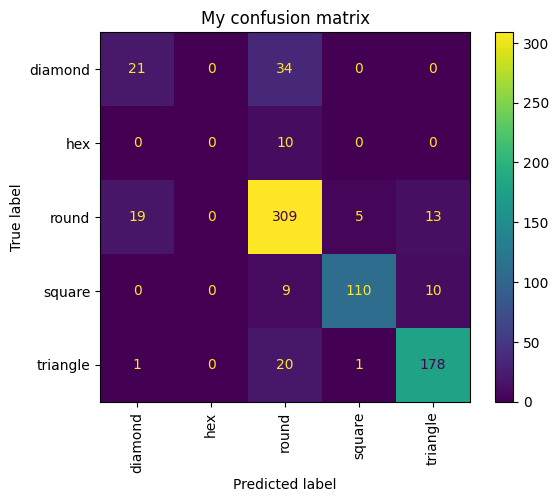

In [ ]:
cm = confusion_matrix(test_data['ID shape'], test_data['Shape Predictions model nb'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_namess)
disp.plot()
plt.title("My confusion matrix")
plt.xticks(rotation = 'vertical')
plt.show()

####Classification report

In [ ]:
print(classification_report(test_data['ID shape'], test_data['Shape Predictions model nb'], target_names = ['diamond', 'hex', 'round', 'square', 'triangle']))

              precision    recall  f1-score   support

     diamond       0.51      0.38      0.44        55
         hex       0.00      0.00      0.00        10
       round       0.81      0.89      0.85       346
      square       0.95      0.85      0.90       129
    triangle       0.89      0.89      0.89       200

    accuracy                           0.84       740
   macro avg       0.63      0.60      0.61       740
weighted avg       0.82      0.84      0.83       740



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Second Model: VGG 1, VGG 2 & VGG 3

Let's do the same process but with other models:

###VGG1

The model is a Convolutional neural network VVG with 3 blocks. In each block there are 2 2D convolutional layers with 32, 64, or 128 layers (depending on the block), a max-pooling layer that reduces the dimension using a 2x2 window
a the ReLU activation function.


We will also try another optimizer in these model: adam.

####VGG 1 model

In [ ]:
model_VGG_1 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_1.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['Recall', 'Precision'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 28

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 5 classes.
Found 740 validated image filenames belonging to 5 classes.


In [ ]:
history_VGG_1 = model_VGG_1.fit_generator(train_generator, validation_data = validation_generator, epochs=25, verbose=0)

<ipython-input-71-d16d37425345>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_VGG_1 = model_VGG_1.fit_generator(train_generator, validation_data = validation_generator, epochs=25, verbose=0)


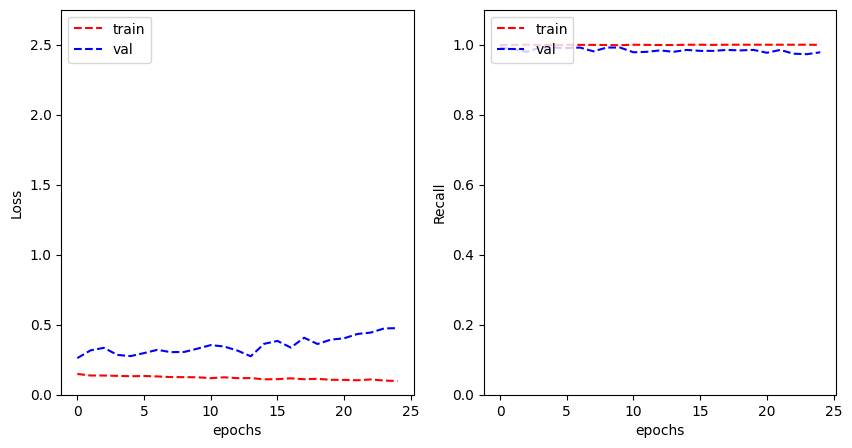

In [ ]:
plot_learning_curve(history_VGG_1.history['loss'], history_VGG_1.history['val_loss'],
                    history_VGG_1.history['recall'], history_VGG_1.history['val_recall'],
                    label1='Loss', label2='Recall')

####Testing the model

Let's use the test dataframe created previously:

In [ ]:
test_data['ID shape'] = test_data['ID shape'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator_vgg_1 = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 740 validated image filenames belonging to 5 classes.


In [ ]:
evaluation_results_VGG_1=model_VGG_1.evaluate(test_generator_vgg_1)

740/740 [==============================] - 6s 8ms/step - loss: 0.4646 - recall: 0.9797 - precision: 0.7521


####Plotting some results

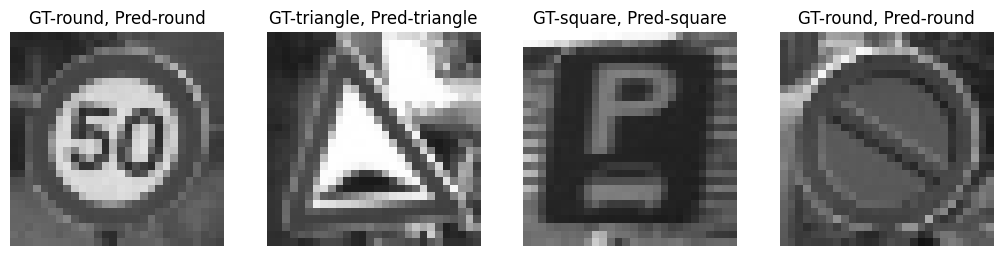

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16,4))
batches = 0
for x,y in test_generator_vgg_1:
        batches = batches + 1
        y_hat = model_VGG_1.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

####Predict all the test set and add it to the test_data dataframe

In [ ]:
label_namess=['diamond', 'hex', 'round', 'square', 'triangle']

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

# Prédictions pour chaque image dans le DataFrame
predictionsList = []
i = 0
for index, row in test_data.iterrows():
    i = i + 1
    print(i)
    img_path = row['File Name']
    image = load_img("./shapes_dataset/"+img_path, target_size=(28, 28))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = test_datagen.standardize(img_array)
    prediction = model_VGG_1.predict(img_array)
    predictionsList.append(prediction)

predictionsList = np.concatenate(predictionsList, axis=0)

res = []
for j in range(len(predictionsList)):
  res.append(d_inv[np.argmax(predictionsList[j])])

# Ajoute les prédictions au DataFrame
test_data['Shape Predictions VGG1'] = res
print(test_data['ID shape'], test_data['Shape Predictions VGG1'])

1
1/1 [==============================] - 0s 52ms/step
2
1/1 [==============================] - 0s 55ms/step
3
1/1 [==============================] - 0s 48ms/step
4
1/1 [==============================] - 0s 45ms/step
5
1/1 [==============================] - 0s 43ms/step
6
1/1 [==============================] - 0s 49ms/step
7
1/1 [==============================] - 0s 39ms/step
8
1/1 [==============================] - 0s 43ms/step
9
1/1 [==============================] - 0s 52ms/step
10
1/1 [==============================] - 0s 47ms/step
11
1/1 [==============================] - 0s 48ms/step
12
1/1 [==============================] - 0s 46ms/step
13
1/1 [==============================] - 0s 42ms/step
14
1/1 [==============================] - 0s 46ms/step
15
1/1 [==============================] - 0s 41ms/step
16
1/1 [==============================] - 0s 47ms/step
17
1/1 [==============================] - 0s 50ms/step
18
1/1 [==============================] - 0s 41ms/step
19
1/1 [===========

In [ ]:
predictions_number=[]
for i in test_data['Shape Predictions VGG1']:
  if (i=="diamond"):
    predictions_number.append('0')
  if (i=="hex"):
    predictions_number.append('1')
  if (i=="round"):
    predictions_number.append('2')
  if (i=="square"):
    predictions_number.append('3')
  if (i=="triangle"):
    predictions_number.append('4')

test_data['Shape Predictions VGG1 nb']=predictions_number
print(test_data['Shape Predictions VGG1'])
print(test_data['Shape Predictions VGG1 nb'])

1042       round
2460      square
315     triangle
3523      square
811     triangle
          ...   
507     triangle
7            hex
3084      square
2828       round
2886       round
Name: Shape Predictions VGG1, Length: 740, dtype: object
1042    2
2460    3
315     4
3523    3
811     4
       ..
507     4
7       1
3084    3
2828    2
2886    2
Name: Shape Predictions VGG1 nb, Length: 740, dtype: object


In [ ]:
print("VGG1 model:")
print("f1-score average micro: ", f1_score(test_data['ID shape'],test_data['Shape Predictions VGG1 nb'], average='micro'))
print("f1-score average macro: ", f1_score(test_data['ID shape'],test_data['Shape Predictions VGG1 nb'], average='macro'))
print("f1-score average weighted: ", f1_score(test_data['ID shape'],test_data['Shape Predictions VGG1 nb'], average='weighted'))

print("\n")
print(precision_score(test_data['ID shape'],test_data['Shape Predictions VGG1 nb'], average='weighted'))
print(recall_score(test_data['ID shape'],test_data['Shape Predictions VGG1 nb'], average='weighted'))

Base model:
f1-score average micro:  0.8689189189189189
f1-score average macro:  0.8168921102441168
f1-score average weighted:  0.8731654711804075


0.8786874356944593
0.8689189189189189


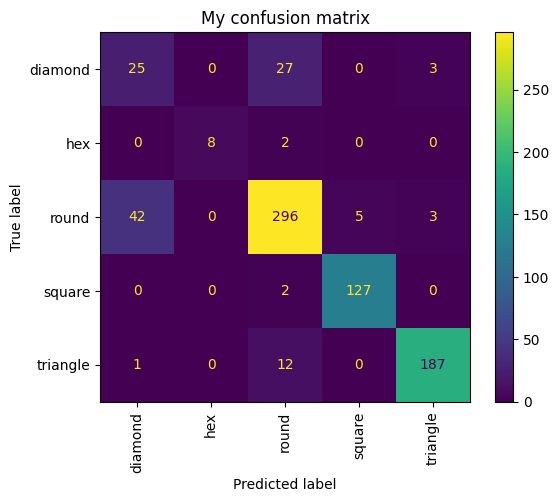

In [ ]:
cm = confusion_matrix(test_data['ID shape'], test_data['Shape Predictions VGG1 nb'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_namess)
disp.plot()
plt.title("My confusion matrix")
plt.xticks(rotation = 'vertical')
plt.show()

####Classification Report

In [ ]:
print(classification_report(test_data['ID shape'], test_data['Shape Predictions VGG1 nb'], target_names = ['diamond', 'hex', 'round', 'square', 'triangle']))

              precision    recall  f1-score   support

     diamond       0.37      0.45      0.41        55
         hex       1.00      0.80      0.89        10
       round       0.87      0.86      0.86       346
      square       0.96      0.98      0.97       129
    triangle       0.97      0.94      0.95       200

    accuracy                           0.87       740
   macro avg       0.83      0.81      0.82       740
weighted avg       0.88      0.87      0.87       740



###VGG2

To reduce the overfitting, we will apply weight regularisation with L2 regularisation (Ridge). We will also apply dropout with a dropout rate of 0.2.

#####VGG 2 model

In [ ]:
reg_lambda = 0.001

model_VGG_2 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(28, 28, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(.2),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_2.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['Recall', 'Precision'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 28

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 5 classes.
Found 740 validated image filenames belonging to 5 classes.


In [ ]:
history_VGG_2 = model_VGG_2.fit_generator(train_generator, validation_data = validation_generator, epochs=100, verbose=0)



<ipython-input-89-2c6f8daaaa5d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_VGG_2 = model_VGG_2.fit_generator(train_generator, validation_data = validation_generator, epochs=100, verbose=0)


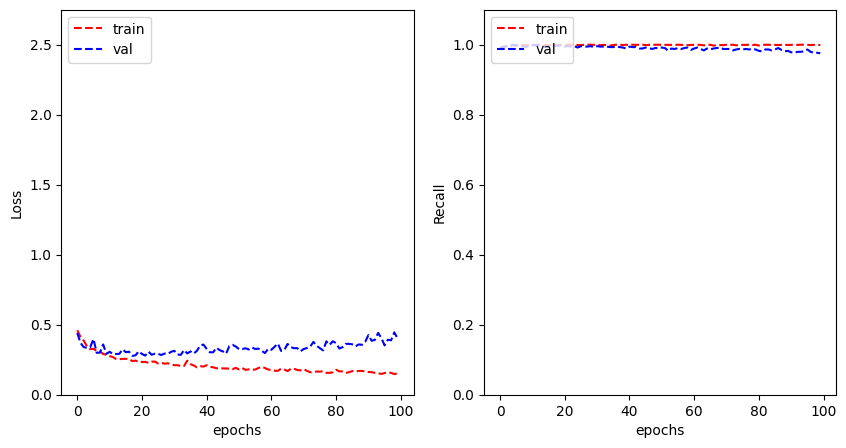

In [ ]:
plot_learning_curve(history_VGG_2.history['loss'], history_VGG_2.history['val_loss'],
                    history_VGG_2.history['recall'], history_VGG_2.history['val_recall'],
                    label1='Loss', label2='Recall')

####Testing the model

In [ ]:
test_data['ID shape'] = test_data['ID shape'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator_vgg_2 = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 740 validated image filenames belonging to 5 classes.


####Plotting some results

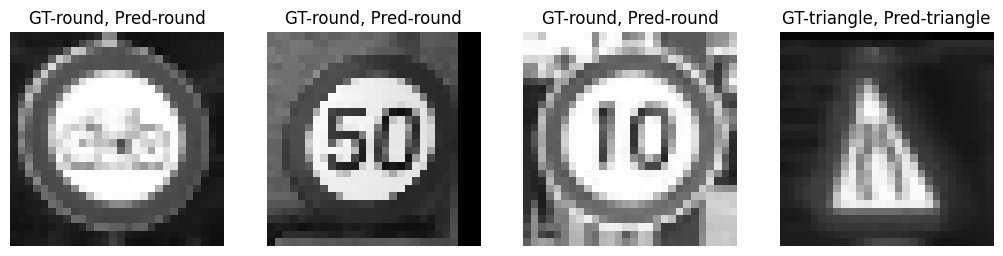

In [ ]:
label_names = {'diamond' : 0, 'hex' : 1, 'round' : 2, 'square' : 3, 'triangle' : 4}

d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16,4))
batches = 0
for x,y in test_generator_vgg_2:
        batches = batches + 1
        y_hat = model_VGG_2.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

####Predict all the test set and add it to the test_data dataframe

In [ ]:
label_namess=['diamond', 'hex', 'round', 'square', 'triangle']

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

# Prédictions pour chaque image dans le DataFrame
predictionsList = []
i = 0
for index, row in test_data.iterrows():
    i = i + 1
    print(i)
    img_path = row['File Name']
    image = load_img("./shapes_dataset/"+img_path, target_size=(28, 28))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = test_datagen.standardize(img_array)
    prediction = model_VGG_2.predict(img_array)
    predictionsList.append(prediction)

predictionsList = np.concatenate(predictionsList, axis=0)

res = []
for j in range(len(predictionsList)):
  res.append(d_inv[np.argmax(predictionsList[j])])

# Ajoute les prédictions au DataFrame
test_data['Shape Predictions VGG2'] = res
print(test_data['ID shape'], test_data['Shape Predictions VGG2'])

1
1/1 [==============================] - 0s 28ms/step
2
1/1 [==============================] - 0s 27ms/step
3
1/1 [==============================] - 0s 36ms/step
4
1/1 [==============================] - 0s 29ms/step
5
1/1 [==============================] - 0s 36ms/step
6
1/1 [==============================] - 0s 31ms/step
7
1/1 [==============================] - 0s 30ms/step
8
1/1 [==============================] - 0s 31ms/step
9
1/1 [==============================] - 0s 29ms/step
10
1/1 [==============================] - 0s 31ms/step
11
1/1 [==============================] - 0s 34ms/step
12
1/1 [==============================] - 0s 37ms/step
13
1/1 [==============================] - 0s 34ms/step
14
1/1 [==============================] - 0s 35ms/step
15
1/1 [==============================] - 0s 28ms/step
16
1/1 [==============================] - 0s 30ms/step
17
1/1 [==============================] - 0s 31ms/step
18
1/1 [==============================] - 0s 31ms/step
19
1/1 [===========

In [ ]:
predictions_number=[]
for i in test_data['Shape Predictions VGG2']:
  if (i=="diamond"):
    predictions_number.append('0')
  if (i=="hex"):
    predictions_number.append('1')
  if (i=="round"):
    predictions_number.append('2')
  if (i=="square"):
    predictions_number.append('3')
  if (i=="triangle"):
    predictions_number.append('4')

test_data['Shape Predictions VGG2 nb']=predictions_number
print(test_data['Shape Predictions VGG2'])
print(test_data['Shape Predictions VGG2 nb'])

1042       round
2460      square
315     triangle
3523      square
811     triangle
          ...   
507     triangle
7            hex
3084      square
2828       round
2886     diamond
Name: Shape Predictions VGG2, Length: 740, dtype: object
1042    2
2460    3
315     4
3523    3
811     4
       ..
507     4
7       1
3084    3
2828    2
2886    0
Name: Shape Predictions VGG2 nb, Length: 740, dtype: object


In [ ]:
print("VGG 2 model:")
print("f1-score average micro: ", f1_score(test_data['ID shape'],test_data['Shape Predictions VGG2 nb'], average='micro'))
print("f1-score average macro: ", f1_score(test_data['ID shape'],test_data['Shape Predictions VGG2 nb'], average='macro'))
print("f1-score average weighted: ", f1_score(test_data['ID shape'],test_data['Shape Predictions VGG2 nb'], average='weighted'))

print("\n")
print(precision_score(test_data['ID shape'],test_data['Shape Predictions VGG2 nb'], average='weighted'))
print(recall_score(test_data['ID shape'],test_data['Shape Predictions VGG2 nb'], average='weighted'))

Base model:
f1-score average micro:  0.8743243243243243
f1-score average macro:  0.8396960847607957
f1-score average weighted:  0.879767118826653


0.8877622002507498
0.8743243243243243


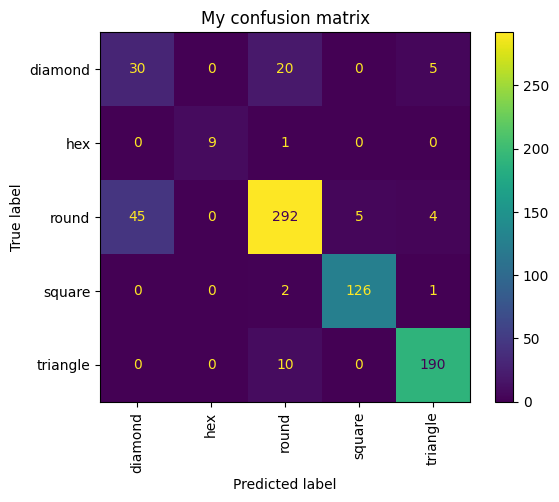

In [ ]:
cm = confusion_matrix(test_data['ID shape'], test_data['Shape Predictions VGG2 nb'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_namess)
disp.plot()
plt.title("My confusion matrix")
plt.xticks(rotation = 'vertical')
plt.show()

####Classification Report

In [ ]:
print(classification_report(test_data['ID shape'], test_data['Shape Predictions VGG2 nb'], target_names = ['diamond', 'hex', 'round', 'square', 'triangle']))

              precision    recall  f1-score   support

     diamond       0.40      0.55      0.46        55
         hex       1.00      0.90      0.95        10
       round       0.90      0.84      0.87       346
      square       0.96      0.98      0.97       129
    triangle       0.95      0.95      0.95       200

    accuracy                           0.87       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.89      0.87      0.88       740



We got better results than previously but we can try other methods to have an even better score.

###VGG 3 (Data Augmentation)

To prevent overfitting, we will try Data Augmentation methods on the previous model (VGG 2). During the EDA, we saw that some classes were under-represented in the dataset, so that could compensate for this lack.

We randomly rotate images within a range of 15 degrees, shift images horizontally and vertically by up to 20% respectively of the width or height, and change the brightness which can vary between 50% and 150% of the original brightness.


####VGG 3 model

In [ ]:
train_data['ID shape'] = train_data['ID shape'].astype('str')
val_data['ID shape'] = val_data['ID shape'].astype('str')

train_datagen_data_augmentation = ImageDataGenerator(rescale=1./255, data_format='channels_last',
                                   rotation_range=15, width_shift_range=0.2,
                                   height_shift_range=0.2, brightness_range=[0.5,1.5])
val_datagen_data_augmentation = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 28

train_generator_data_augmentation = train_datagen_data_augmentation.flow_from_dataframe(
        dataframe=train_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator_data_augmentation = val_datagen_data_augmentation.flow_from_dataframe(
        dataframe=val_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 5 classes.
Found 740 validated image filenames belonging to 5 classes.


In [ ]:
reg_lambda = 0.001

model_VGG_3 = tf.keras.Sequential([
    #VGG block 1
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda), input_shape=(28, 28, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG block 2
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),

    #VGG block 3
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                           kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.MaxPooling2D((2, 2)),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Dense(OUTPUT_CLASSES),
])

In [ ]:
model_VGG_3.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['Recall', 'Precision'])

<ipython-input-104-9e054b10bca8>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_VGG_3 = model_VGG_3.fit_generator(train_generator_data_augmentation, validation_data = validation_generator_data_augmentation, epochs=100, verbose=0)


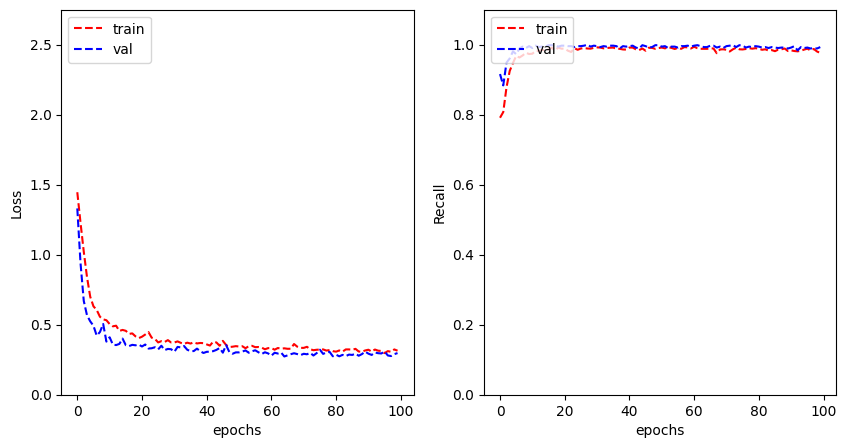

In [ ]:
history_VGG_3 = model_VGG_3.fit_generator(train_generator_data_augmentation, validation_data = validation_generator_data_augmentation, epochs=100, verbose=0)

plot_learning_curve(history_VGG_3.history['loss'], history_VGG_3.history['val_loss'],
                    history_VGG_3.history['recall'], history_VGG_3.history['val_recall'],
                    label1='Loss', label2='Recall')

####Testing the model

In [ ]:
test_data['ID shape'] = test_data['ID shape'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator_vgg_3 = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 740 validated image filenames belonging to 5 classes.


In [ ]:
evaluation_results_VGG_3 = model_VGG_3.evaluate(test_generator_vgg_3)

740/740 [==============================] - 9s 12ms/step - loss: 0.3022 - recall: 0.9905 - precision: 0.6556


####Plotting some results

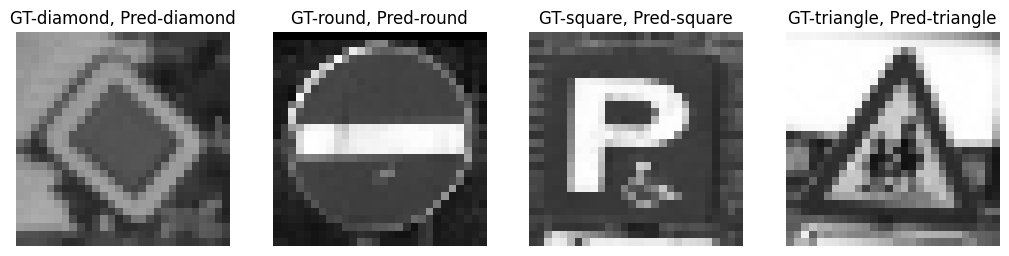

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16,4))
batches = 0
for x,y in test_generator_vgg_3:
        batches = batches + 1
        y_hat = model_VGG_3.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

####Predict all the test set and add it to the test_data dataframe

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

# Prédictions pour chaque image dans le DataFrame
predictionsList = []
i = 0
for index, row in test_data.iterrows():
    i = i + 1
    print(i)
    img_path = row['File Name']
    image = load_img("./shapes_dataset/"+img_path, target_size=(28, 28))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = test_datagen.standardize(img_array)
    prediction = model_VGG_3.predict(img_array)
    predictionsList.append(prediction)

predictionsList = np.concatenate(predictionsList, axis=0)

res = []
for j in range(len(predictionsList)):
  res.append(d_inv[np.argmax(predictionsList[j])])

# Ajoute les prédictions au DataFrame
test_data['Shape Predictions VGG3'] = res
print(test_data['ID shape'], test_data['Shape Predictions VGG3'])

1
1/1 [==============================] - 0s 56ms/step
2
1/1 [==============================] - 0s 29ms/step
3
1/1 [==============================] - 0s 45ms/step
4
1/1 [==============================] - 0s 40ms/step
5
1/1 [==============================] - 0s 52ms/step
6
1/1 [==============================] - 0s 35ms/step
7
1/1 [==============================] - 0s 29ms/step
8
1/1 [==============================] - 0s 31ms/step
9
1/1 [==============================] - 0s 44ms/step
10
1/1 [==============================] - 0s 31ms/step
11
1/1 [==============================] - 0s 36ms/step
12
1/1 [==============================] - 0s 68ms/step
13
1/1 [==============================] - 0s 31ms/step
14
1/1 [==============================] - 0s 36ms/step
15
1/1 [==============================] - 0s 37ms/step
16
1/1 [==============================] - 0s 35ms/step
17
1/1 [==============================] - 0s 31ms/step
18
1/1 [==============================] - 0s 31ms/step
19
1/1 [===========

In [ ]:
predictions_number=[]
for i in test_data['Shape Predictions VGG3']:
  if (i=="diamond"):
    predictions_number.append('0')
  if (i=="hex"):
    predictions_number.append('1')
  if (i=="round"):
    predictions_number.append('2')
  if (i=="square"):
    predictions_number.append('3')
  if (i=="triangle"):
    predictions_number.append('4')

test_data['Shape Predictions VGG3 nb']=predictions_number
print(test_data['Shape Predictions VGG3'])
print(test_data['Shape Predictions VGG3 nb'])

1042       round
2460      square
315     triangle
3523      square
811     triangle
          ...   
507     triangle
7            hex
3084      square
2828     diamond
2886     diamond
Name: Shape Predictions VGG3, Length: 740, dtype: object
1042    2
2460    3
315     4
3523    3
811     4
       ..
507     4
7       1
3084    3
2828    0
2886    0
Name: Shape Predictions VGG3 nb, Length: 740, dtype: object


In [ ]:
print("VGG 3 model:")
print("f1-score average micro: ", f1_score(test_data['ID shape'],test_data['Shape Predictions VGG3 nb'], average='micro'))
print("f1-score average macro: ", f1_score(test_data['ID shape'],test_data['Shape Predictions VGG3 nb'], average='macro'))
print("f1-score average weighted: ", f1_score(test_data['ID shape'],test_data['Shape Predictions VGG3 nb'], average='weighted'))

print("\n")
print(precision_score(test_data['ID shape'],test_data['Shape Predictions VGG3 nb'], average='weighted'))
print(recall_score(test_data['ID shape'],test_data['Shape Predictions VGG3 nb'], average='weighted'))

Base model:
f1-score average micro:  0.9013513513513515
f1-score average macro:  0.895645480347467
f1-score average weighted:  0.9084133563769325


0.9260829280713834
0.9013513513513514


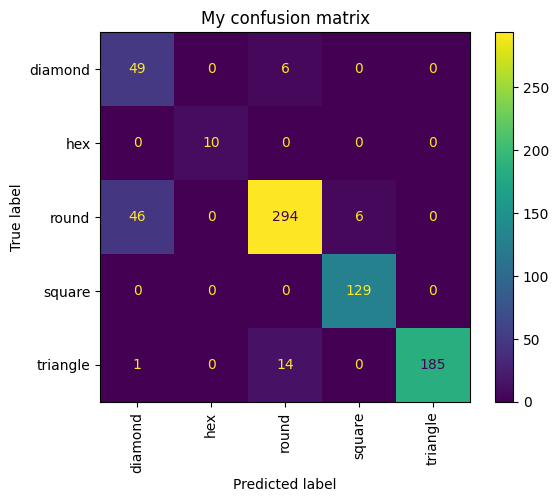

In [ ]:
cm = confusion_matrix(test_data['ID shape'], test_data['Shape Predictions VGG3 nb'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_namess)
disp.plot()
plt.title("My confusion matrix")
plt.xticks(rotation = 'vertical')
plt.show()

####Classification Report

In [ ]:
print(classification_report(test_data['ID shape'], test_data['Shape Predictions VGG3 nb'], target_names = ['diamond', 'hex', 'round', 'square', 'triangle']))

              precision    recall  f1-score   support

     diamond       0.51      0.89      0.65        55
         hex       1.00      1.00      1.00        10
       round       0.94      0.85      0.89       346
      square       0.96      1.00      0.98       129
    triangle       1.00      0.93      0.96       200

    accuracy                           0.90       740
   macro avg       0.88      0.93      0.90       740
weighted avg       0.93      0.90      0.91       740



#Third model: model leNet

We tried another model, which can be used on small images such as the ones in our dataset.

In [ ]:
reg_lambda = 0.001
OUTPUT_CLASSES = 5

model_leNet = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28, 28, 3)),
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x[:,:,:,0], -1, name=None)),

    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(reg_lambda)),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2,2)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(OUTPUT_CLASSES, activation='softmax', kernel_regularizer=tf.keras.regularizers.l2(reg_lambda))
])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')
val_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 28

train_generator = train_datagen.flow_from_dataframe(
        dataframe=train_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

validation_generator = val_datagen.flow_from_dataframe(
        dataframe=val_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 2219 validated image filenames belonging to 5 classes.
Found 740 validated image filenames belonging to 5 classes.


In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01,  momentum=0.9, nesterov=True)
model_leNet.compile(optimizer=sgd,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['Recall', 'Precision'])

history_leNet = model_leNet.fit_generator(train_generator,
                                    validation_data = validation_generator,
                                    epochs=100, verbose=0)

<ipython-input-163-9d20882ea6af>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_leNet = model_leNet.fit_generator(train_generator,


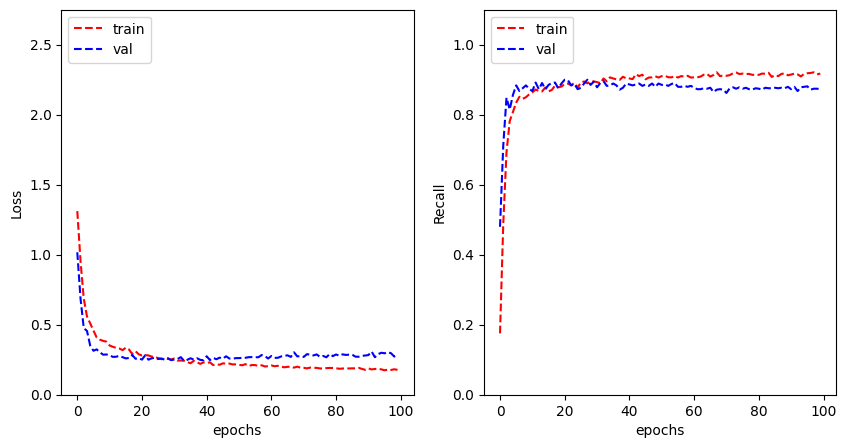

In [ ]:
plot_learning_curve(history_leNet.history['loss'], history_leNet.history['val_loss'],
                    history_leNet.history['recall'], history_leNet.history['val_recall'],
                    label1='Loss', label2='Recall')


##Testing this model

In [ ]:
test_data['ID shape'] = test_data['ID shape'].astype('str')

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

batch_size = 1

test_generator_leNet = test_datagen.flow_from_dataframe(
        dataframe=test_data,
        directory='./shapes_dataset',
        x_col="File Name",
        y_col="ID shape",
        target_size=(28, 28),
        batch_size=batch_size,
        class_mode='categorical')

Found 740 validated image filenames belonging to 5 classes.


In [ ]:
evaluation_results_leNet = model_leNet.evaluate(test_generator_leNet)

740/740 [==============================] - 4s 5ms/step - loss: 0.3018 - recall: 0.8797 - precision: 0.8809


##Plotting some results

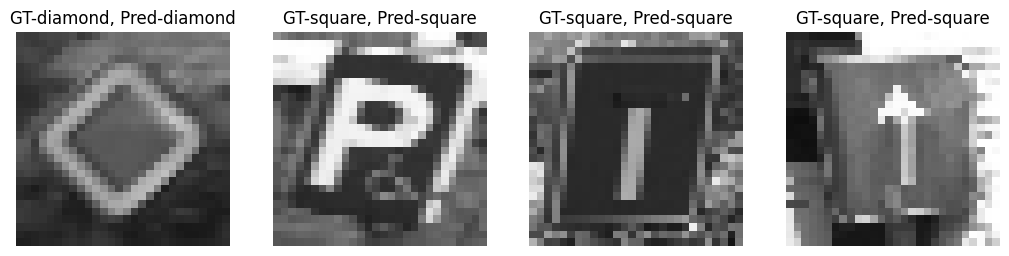

In [ ]:
d_inv = {v: k for k, v in label_names.items()}
plt.figure(figsize=(16,4))
batches = 0
for x,y in test_generator_leNet:
        batches = batches + 1
        y_hat = model_leNet.predict(x, verbose=0)
        x = np.squeeze(x)
        if batches < 5:
            plt.subplot(1,5,batches)
            plt.imshow(x)
            plt.title("GT-{}, Pred-{}".format(d_inv[np.argmax(y[0])], d_inv[np.argmax(y_hat[0])] ))

        else:
            break

        plt.axis('off')

##Predict all the test set and add it to the test_data dataframe

In [ ]:
label_namess=['diamond', 'hex', 'round', 'square', 'triangle']

test_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

# Prédictions pour chaque image dans le DataFrame
predictionsList = []
i = 0
for index, row in test_data.iterrows():
    i = i + 1
    print(i)
    img_path = row['File Name']
    image = load_img("./shapes_dataset/"+img_path, target_size=(28, 28))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = test_datagen.standardize(img_array)
    prediction = model_leNet.predict(img_array)
    predictionsList.append(prediction)

predictionsList = np.concatenate(predictionsList, axis=0)

res = []
for j in range(len(predictionsList)):
  res.append(d_inv[np.argmax(predictionsList[j])])

# Ajoute les prédictions au DataFrame
test_data['Shape Predictions leNet'] = res
print(test_data['ID shape'], test_data['Shape Predictions leNet'])

1
1/1 [==============================] - 0s 40ms/step
2
1/1 [==============================] - 0s 37ms/step
3
1/1 [==============================] - 0s 38ms/step
4
1/1 [==============================] - 0s 35ms/step
5
1/1 [==============================] - 0s 38ms/step
6
1/1 [==============================] - 0s 35ms/step
7
1/1 [==============================] - 0s 38ms/step
8
1/1 [==============================] - 0s 30ms/step
9
1/1 [==============================] - 0s 38ms/step
10
1/1 [==============================] - 0s 33ms/step
11
1/1 [==============================] - 0s 28ms/step
12
1/1 [==============================] - 0s 32ms/step
13
1/1 [==============================] - 0s 29ms/step
14
1/1 [==============================] - 0s 54ms/step
15
1/1 [==============================] - 0s 47ms/step
16
1/1 [==============================] - 0s 50ms/step
17
1/1 [==============================] - 0s 51ms/step
18
1/1 [==============================] - 0s 52ms/step
19
1/1 [===========

In [ ]:
predictions_number=[]
for i in test_data['Shape Predictions leNet']:
  if (i=="diamond"):
    predictions_number.append('0')
  if (i=="hex"):
    predictions_number.append('1')
  if (i=="round"):
    predictions_number.append('2')
  if (i=="square"):
    predictions_number.append('3')
  if (i=="triangle"):
    predictions_number.append('4')

test_data['Shape Predictions leNet nb']=predictions_number
print(test_data['Shape Predictions leNet'])
print(test_data['Shape Predictions leNet nb'])

1042       round
2460      square
315     triangle
3523      square
811     triangle
          ...   
507     triangle
7            hex
3084      square
2828       round
2886     diamond
Name: Shape Predictions leNet, Length: 740, dtype: object
1042    2
2460    3
315     4
3523    3
811     4
       ..
507     4
7       1
3084    3
2828    2
2886    0
Name: Shape Predictions leNet nb, Length: 740, dtype: object


In [ ]:
print("Base model:")
print("f1-score average micro: ", f1_score(test_data['ID shape'],test_data['Shape Predictions leNet nb'], average='micro'))
print("f1-score average macro: ", f1_score(test_data['ID shape'],test_data['Shape Predictions leNet nb'], average='macro'))
print("f1-score average weighted: ", f1_score(test_data['ID shape'],test_data['Shape Predictions leNet nb'], average='weighted'))

print("\n")
print(precision_score(test_data['ID shape'],test_data['Shape Predictions leNet nb'], average='weighted'))
print(recall_score(test_data['ID shape'],test_data['Shape Predictions leNet nb'], average='weighted'))

Base model:
f1-score average micro:  0.8797297297297297
f1-score average macro:  0.857749792942227
f1-score average weighted:  0.8870526591861099


0.9008751991832429
0.8797297297297297


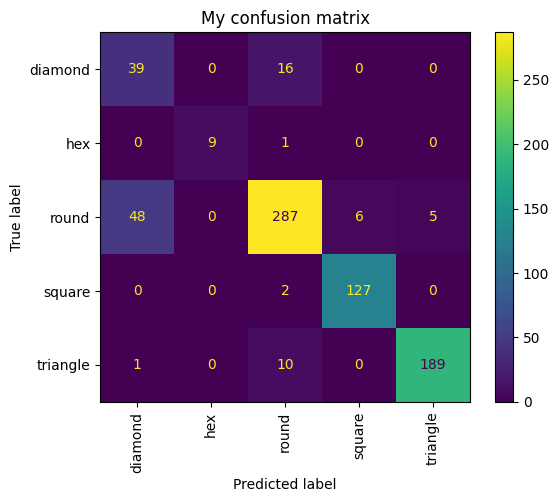

In [ ]:
cm = confusion_matrix(test_data['ID shape'], test_data['Shape Predictions leNet nb'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_namess)
disp.plot()
plt.title("My confusion matrix")
plt.xticks(rotation = 'vertical')
plt.show()

##Classification Report

In [ ]:
print(classification_report(test_data['ID shape'], test_data['Shape Predictions leNet nb'], target_names = ['diamond', 'hex', 'round', 'square', 'triangle']))

              precision    recall  f1-score   support

     diamond       0.44      0.71      0.55        55
         hex       1.00      0.90      0.95        10
       round       0.91      0.83      0.87       346
      square       0.95      0.98      0.97       129
    triangle       0.97      0.94      0.96       200

    accuracy                           0.88       740
   macro avg       0.86      0.87      0.86       740
weighted avg       0.90      0.88      0.89       740



#Fourth model: SVM

The last model tried was the SVM model which can be used in classification task. It can be efficient with huge amount of data like ours.

The dataframe for this model was created at the beginning of the Notebook.

In [14]:
x=df_svm.iloc[:,:-1]
y=df_svm.iloc[:,-1]

In [15]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,
                                               random_state=77,
                                               stratify=y)

In [ ]:
param_grid={'C':[0.1,1,10,100],
			'gamma':[0.0001,0.001,0.1,1],
			'kernel':['rbf','poly']}

svc=svm.SVC(probability=True)

model_svm=GridSearchCV(svc,param_grid)


##Train the model

In [ ]:
model_svm.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [13]:
best_param=model_svm.best_params_
best_estimator=model_svm.best_estimator_

print(best_param, best_estimator)

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'} SVC(C=100, gamma=0.001, probability=True)


In [16]:
params = {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

svc = svm.SVC(probability=True, **params)

svc.fit(x_train, y_train)

SVC(C=100, gamma=0.001, probability=True)

In [32]:
model_svm=svc

##Testing the model

In [31]:
y_pred = svc.predict(x_test)

f1_score_svm=f1_score(y_test,y_pred,average="micro")
print("SVM model:")
print("f1-score average micro: ", f1_score(y_test,y_pred, average='micro'))
print("f1-score average macro: ", f1_score(y_test,y_pred, average='macro'))
print("f1-score average weighted: ", f1_score(y_test,y_pred, average='weighted'))

SVM model:
f1-score average micro:  0.9657064471879286
f1-score average macro:  0.9671748206599119
f1-score average weighted:  0.9656590859633795


##Classification report

In [20]:
print(classification_report(y_test, y_pred, target_names=['diamond','hex','round','square','triangle'] ))

              precision    recall  f1-score   support

     diamond       0.95      0.93      0.94        56
         hex       1.00      1.00      1.00         9
       round       0.95      0.99      0.97       341
      square       0.97      0.95      0.96       138
    triangle       1.00      0.94      0.97       185

    accuracy                           0.97       729
   macro avg       0.97      0.96      0.97       729
weighted avg       0.97      0.97      0.97       729



#Save Models

###Base Model

In [ ]:
model.save("shape_model")
!cp -R ./shape_model /content/drive/'My Drive'/Assignment2_CML/Assignment2_Machine_Learning/

###VGG1

In [ ]:
model_VGG_1.save("shape_model_VGG_1")
!cp -R ./shape_model_VGG_1 /content/drive/'My Drive'/Assignment2_CML/Assignment2_Machine_Learning/

###VGG2

In [ ]:
model_VGG_2.save("shape_model_VGG_2")
!cp -R ./shape_model_VGG_2 /content/drive/'My Drive'/Assignment2_CML/Assignment2_Machine_Learning/

###VGG3

In [ ]:
model_VGG_3.save("shape_model_VGG_3")
!cp -R ./shape_model_VGG_3 /content/drive/'My Drive'/Assignment2_CML/Assignment2_Machine_Learning/

###Le Net

In [ ]:
model_leNet.save("shape_model_leNet")
!cp -R ./shape_model_leNet /content/drive/'My Drive'/Assignment2_CML/Assignment2_Machine_Learning/

##SVM

In [30]:
import joblib

joblib.dump(svc, '/content/drive/My Drive/Assignment2_CML/Assignment2_Machine_Learning/shape_model_svm.joblib')


['/content/drive/My Drive/Assignment2_CML/Assignment2_Machine_Learning/shape_model_svm.joblib']

#Summary

##Table (F1 scores)

In [ ]:
#Base Model

f1score_model=f1_score(test_data['ID shape'],test_data['Shape Predictions model nb'], average='micro')
f1score_model_macro=f1_score(test_data['ID shape'],test_data['Shape Predictions model nb'], average='macro')
f1score_model_weighted=f1_score(test_data['ID shape'],test_data['Shape Predictions model nb'], average='weighted')

#VGG1 Model

f1score_VGG_1=f1_score(test_data['ID shape'],test_data['Shape Predictions VGG1 nb'], average='micro')
f1score_VGG_1_macro=f1_score(test_data['ID shape'],test_data['Shape Predictions VGG1 nb'], average='macro')
f1score_VGG_1_weighted=f1_score(test_data['ID shape'],test_data['Shape Predictions VGG1 nb'], average='weighted')

#VGG2 Model

f1score_VGG_2=f1_score(test_data['ID shape'],test_data['Shape Predictions VGG2 nb'], average='micro')
f1score_VGG_2_macro=f1_score(test_data['ID shape'],test_data['Shape Predictions VGG2 nb'], average='macro')
f1score_VGG_2_weighted=f1_score(test_data['ID shape'],test_data['Shape Predictions VGG2 nb'], average='weighted')

#VGG3 Model

f1score_VGG_3=f1_score(test_data['ID shape'],test_data['Shape Predictions VGG3 nb'], average='micro')
f1score_VGG_3_macro=f1_score(test_data['ID shape'],test_data['Shape Predictions VGG3 nb'], average='macro')
f1score_VGG_3_weighted=f1_score(test_data['ID shape'],test_data['Shape Predictions VGG3 nb'], average='weighted')


#leNet Model

f1score_leNet=f1_score(test_data['ID shape'],test_data['Shape Predictions leNet nb'], average='micro')
f1score_leNet_macro=f1_score(test_data['ID shape'],test_data['Shape Predictions leNet nb'], average='macro')
f1score_leNet_weighted=f1_score(test_data['ID shape'],test_data['Shape Predictions leNet nb'], average='weighted')

#SVM Model

f1score_svm=f1_score(y_test,y_pred, average='micro')
f1score_svm_macro=f1_score(y_test,y_pred, average='macro')
f1score_svm_weighted=f1_score(y_test,y_pred, average='weighted')


In [ ]:
models = ['First Model', 'VGG 1','VGG 2','VGG 3','Le Net','SVM']
f1_scores=[f1score_model,f1score_VGG_1,f1score_VGG_2,f1score_VGG_3,f1score_leNet,f1score_svm]
f1_scores_macro=[f1score_model_macro,f1score_VGG_1_macro,f1score_VGG_2_macro,f1score_VGG_3_macro,f1score_leNet_macro,f1score_svm_macro]
f1_scores_weighted=[f1score_model_weighted,f1score_VGG_1_weighted,f1score_VGG_2_weighted,f1score_VGG_3_weighted,f1score_leNet_weighted,f1score_svm_weighted]

data = {'Models': models, 'F1 scores (micro)': f1_scores, 'F1 scores (macro)': f1_scores_macro,'F1 scores (weighted)': f1_scores_weighted}
dataFrame = pd.DataFrame(data)

table = tabulate(dataFrame, headers='keys', tablefmt='pretty', showindex=False)

print(table)

+-------------+--------------------+--------------------+----------------------+
|   Models    | F1 scores (micro)  | F1 scores (macro)  | F1 scores (weighted) |
+-------------+--------------------+--------------------+----------------------+
| First Model | 0.835135135135135  | 0.6144281662405995 |  0.8259123305937076  |
|    VGG 1    | 0.8689189189189189 | 0.8168921102441168 |  0.8731654711804075  |
|    VGG 2    | 0.8743243243243243 | 0.8396960847607957 |  0.879767118826653   |
|    VGG 3    | 0.9013513513513515 | 0.895645480347467  |  0.9084133563769325  |
|   Le Net    | 0.8797297297297297 | 0.857749792942227  |  0.8870526591861099  |
|     SVM     | 0.9657064471879286 | 0.9671748206599119 |  0.9656590859633795  |
+-------------+--------------------+--------------------+----------------------+


##Classification Reports (sklearn)

In [ ]:
print(classification_report(test_data['ID shape'], test_data['Shape Predictions model nb'], target_names = ['diamond', 'hex', 'round', 'square', 'triangle']))

              precision    recall  f1-score   support

     diamond       0.51      0.38      0.44        55
         hex       0.00      0.00      0.00        10
       round       0.81      0.89      0.85       346
      square       0.95      0.85      0.90       129
    triangle       0.89      0.89      0.89       200

    accuracy                           0.84       740
   macro avg       0.63      0.60      0.61       740
weighted avg       0.82      0.84      0.83       740



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(classification_report(test_data['ID shape'], test_data['Shape Predictions VGG1 nb'], target_names = ['diamond', 'hex', 'round', 'square', 'triangle']))

              precision    recall  f1-score   support

     diamond       0.37      0.45      0.41        55
         hex       1.00      0.80      0.89        10
       round       0.87      0.86      0.86       346
      square       0.96      0.98      0.97       129
    triangle       0.97      0.94      0.95       200

    accuracy                           0.87       740
   macro avg       0.83      0.81      0.82       740
weighted avg       0.88      0.87      0.87       740



In [ ]:
print(classification_report(test_data['ID shape'], test_data['Shape Predictions VGG2 nb'], target_names = ['diamond', 'hex', 'round', 'square', 'triangle']))

              precision    recall  f1-score   support

     diamond       0.40      0.55      0.46        55
         hex       1.00      0.90      0.95        10
       round       0.90      0.84      0.87       346
      square       0.96      0.98      0.97       129
    triangle       0.95      0.95      0.95       200

    accuracy                           0.87       740
   macro avg       0.84      0.84      0.84       740
weighted avg       0.89      0.87      0.88       740



In [ ]:
print(classification_report(test_data['ID shape'], test_data['Shape Predictions VGG3 nb'], target_names = ['diamond', 'hex', 'round', 'square', 'triangle']))

              precision    recall  f1-score   support

     diamond       0.51      0.89      0.65        55
         hex       1.00      1.00      1.00        10
       round       0.94      0.85      0.89       346
      square       0.96      1.00      0.98       129
    triangle       1.00      0.93      0.96       200

    accuracy                           0.90       740
   macro avg       0.88      0.93      0.90       740
weighted avg       0.93      0.90      0.91       740



In [ ]:
print(classification_report(test_data['ID shape'], test_data['Shape Predictions leNet nb'], target_names = ['diamond', 'hex', 'round', 'square', 'triangle']))

              precision    recall  f1-score   support

     diamond       0.44      0.71      0.55        55
         hex       1.00      0.90      0.95        10
       round       0.91      0.83      0.87       346
      square       0.95      0.98      0.97       129
    triangle       0.97      0.94      0.96       200

    accuracy                           0.88       740
   macro avg       0.86      0.87      0.86       740
weighted avg       0.90      0.88      0.89       740



In [ ]:
print(classification_report(y_test, y_pred, target_names=['diamond','hex','round','square','triangle'] ))

              precision    recall  f1-score   support

     diamond       1.00      0.93      0.96        56
         hex       1.00      0.89      0.94         9
       round       0.97      1.00      0.98       341
      square       0.98      0.95      0.97       138
    triangle       0.98      0.97      0.98       185

    accuracy                           0.98       729
   macro avg       0.99      0.95      0.97       729
weighted avg       0.98      0.98      0.98       729



# New dataset

## Import the dataset and create shape and type dataframes

In [ ]:
!cp /content/drive/'My Drive'/Assignment2_CML/Assignment2_Machine_Learning/Independant_Evaluation_dataset.zip . # to change depending on where you unzip our work

In [ ]:
# path to zip
zip_file_path = "./Independant_Evaluation_dataset.zip"

# path to repertory where the directiory content will be extracted
extracted_dir = "./"

# zip extraction
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir)

# remove what we do not need
!rm -r __MACOSX/
!rm -r sample_data/

new_data_dir = extracted_dir + "Independant_Evaluation"

rm: cannot remove '__MACOSX/': No such file or directory
rm: cannot remove 'sample_data/': No such file or directory


Creation of the dataframes:

In [ ]:
files_names = []
shapes_list = []
types_list = []

for shape in os.listdir(new_data_dir):
  shape_path = os.path.join(new_data_dir, shape)
  if os.path.isdir(shape_path):
    for type in os.listdir(shape_path):
      shape_type_path = os.path.join(shape_path, type)
      if os.path.isdir(shape_type_path):
        for image in os.listdir(shape_type_path):
          image_path = os.path.join(shape_type_path, image)
          files_names.append(image_path)
          types_list.append(type)
          shapes_list.append(shape)

# shapes
# pandas dataframe creation
new_df1 = pd.DataFrame({"File path": files_names, "Shape": shapes_list})
# write in CSV
new_df1.to_csv("new_signs_shape.csv", index=False)

# types
# pandas dataframe creation
new_df2 = pd.DataFrame({"File path": files_names, "Type": types_list})
# write in CSV
new_df2.to_csv("new_signs_type.csv", index=False)

## Analyse/check the new dataset

In [ ]:
# number of images

images_count = len(new_df1['File path'])
print("Nb of images :", images_count, "\n")

Nb of images : 528 



Number of images in each shape class
Shape
round       261
triangle    119
square       60
diamond      47
hex          41
Name: count, dtype: int64


([0, 1, 2, 3, 4],
 [Text(0, 0, 'hex'),
  Text(1, 0, 'triangle'),
  Text(2, 0, 'round'),
  Text(3, 0, 'diamond'),
  Text(4, 0, 'square')])

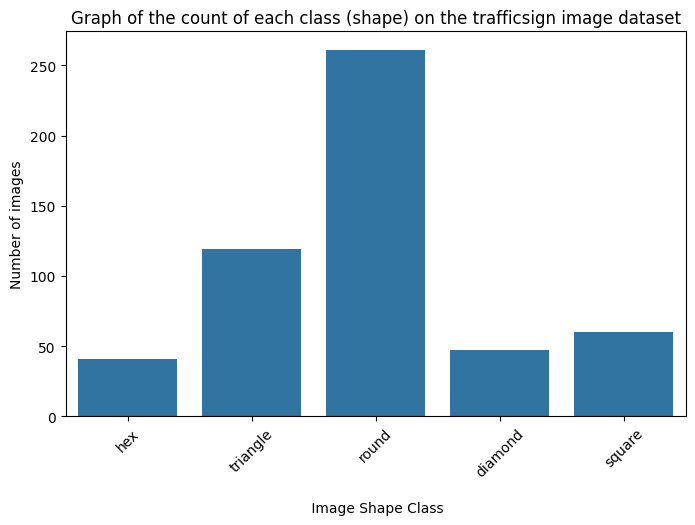

In [ ]:
print('Number of images in each shape class')
print(new_df1['Shape'].value_counts())

fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(data=new_df1, x='Shape')
plt.title('Graph of the count of each class (shape) on the trafficsign image dataset')
plt.xlabel('\n Image Shape Class')
plt.ylabel('Number of images')
plt.xticks(rotation=45)

## Make shape classifications with the models

### Import the dataframe

In [ ]:
new_data = pd.read_csv('./new_signs_shape.csv')

### Classification with the base model

In [ ]:
new_datagen = ImageDataGenerator(rescale=1./255, data_format='channels_last')

# Predictions for each image of the dataFrame
shapePredictionsList_model = []
shapePredictionsList_VGG1_model = []
shapePredictionsList_VGG2_model = []
shapePredictionsList_VGG3_model = []
shapePredictionsList_leNet_model = []

i = 0
for index, row in new_data.iterrows():
    i = i + 1
    print(i)
    img_path = row['File path']
    image = load_img(img_path, target_size=(28, 28))
    img_array = img_to_array(image)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = new_datagen.standardize(img_array)

    model_prediction = model.predict(img_array)
    shapePredictionsList_model.append(model_prediction)

    VGG1_model_prediction = model_VGG_1.predict(img_array)
    shapePredictionsList_VGG1_model.append(VGG1_model_prediction)

    VGG2_model_prediction = model_VGG_2.predict(img_array)
    shapePredictionsList_VGG2_model.append(VGG2_model_prediction)

    VGG3_model_prediction = model_VGG_3.predict(img_array)
    shapePredictionsList_VGG3_model.append(VGG3_model_prediction)

    leNet_model_prediction = model_leNet.predict(img_array)
    shapePredictionsList_leNet_model.append(leNet_model_prediction)



shapePredictionsList_model = np.concatenate(shapePredictionsList_model, axis=0)
shapePredictionsList_VGG1_model = np.concatenate(shapePredictionsList_VGG1_model, axis=0)
shapePredictionsList_VGG2_model = np.concatenate(shapePredictionsList_VGG2_model, axis=0)
shapePredictionsList_VGG3_model = np.concatenate(shapePredictionsList_VGG3_model, axis=0)
shapePredictionsList_leNet_model = np.concatenate(shapePredictionsList_leNet_model, axis=0)

res_model = []
res_VGG1 = []
res_VGG2 = []
res_VGG3 = []
res_leNet = []


label_namess=['diamond', 'hex', 'round', 'square', 'triangle']

for j in range(len(shapePredictionsList_model)):
  res_model.append(label_namess[np.argmax(shapePredictionsList_model[j])])
  res_VGG1.append(label_namess[np.argmax(shapePredictionsList_VGG1_model[j])])
  res_VGG2.append(label_namess[np.argmax(shapePredictionsList_VGG2_model[j])])
  res_VGG3.append(label_namess[np.argmax(shapePredictionsList_VGG3_model[j])])
  res_leNet.append(label_namess[np.argmax(shapePredictionsList_leNet_model[j])])



# add the predictions to the dataFrame
new_data['Shape model'] = res_model
new_data['Shape VGG 1 model'] = res_VGG1
new_data['Shape VGG 2 model'] = res_VGG2
new_data['Shape VGG 3 model'] = res_VGG3
new_data['Shape leNet model'] = res_leNet

1
1/1 [==============================] - 0s 29ms/step
2
1/1 [==============================] - 0s 26ms/step
3
1/1 [==============================] - 0s 25ms/step
4
1/1 [==============================] - 0s 27ms/step
5
1/1 [==============================] - 0s 30ms/step
6
1/1 [==============================] - 0s 46ms/step
7
1/1 [==============================] - 0s 36ms/step
8
1/1 [==============================] - 0s 39ms/step
9
1/1 [==============================] - 0s 34ms/step
10
1/1 [==============================] - 0s 37ms/step
11
1/1 [==============================] - 0s 38ms/step
12
1/1 [==============================] - 0s 48ms/step
13
1/1 [==============================] - 0s 46ms/step
14
1/1 [==============================] - 0s 41ms/step
15
1/1 [==============================] - 0s 25ms/step
16
1/1 [==============================] - 0s 26ms/step
17
1/1 [==============================] - 0s 25ms/step
18
1/1 [==============================] - 0s 27ms/step
19
1/1 [===========

### Analyse the results

In [ ]:
print("Base model:")
print("f1-score average micro: ", f1_score(new_data['Shape'],new_data['Shape model'], average='micro'))
print("f1-score average macro: ", f1_score(new_data['Shape'],new_data['Shape model'], average='macro'))
print("f1-score average weighted: ", f1_score(new_data['Shape'],new_data['Shape model'], average='weighted'))

print("\n")
print("VGG 1 model:\n")
print("f1-score average micro: ", f1_score(new_data['Shape'],new_data['Shape VGG 1 model'], average='micro'))
print("f1-score average macro: ", f1_score(new_data['Shape'],new_data['Shape VGG 1 model'], average='macro'))
print("f1-score average weighted: ", f1_score(new_data['Shape'],new_data['Shape VGG 1 model'], average='weighted'))

print("\n")
print("VGG 2 model:\n")
print("f1-score average micro: ", f1_score(new_data['Shape'],new_data['Shape VGG 2 model'], average='micro'))
print("f1-score average macro: ", f1_score(new_data['Shape'],new_data['Shape VGG 2 model'], average='macro'))
print("f1-score average weighted: ", f1_score(new_data['Shape'],new_data['Shape VGG 2 model'], average='weighted'))

print("\n")
print("VGG 3 model:\n")
print("f1-score average micro: ", f1_score(new_data['Shape'],new_data['Shape VGG 3 model'], average='micro'))
print("f1-score average macro: ", f1_score(new_data['Shape'],new_data['Shape VGG 3 model'], average='macro'))
print("f1-score average weighted: ", f1_score(new_data['Shape'],new_data['Shape VGG 3 model'], average='weighted'))

print("\n")
print("LeNet model:\n")
print("f1-score average micro: ", f1_score(new_data['Shape'],new_data['Shape leNet model'], average='micro'))
print("f1-score average macro: ", f1_score(new_data['Shape'],new_data['Shape leNet model'], average='macro'))
print("f1-score average weighted: ", f1_score(new_data['Shape'],new_data['Shape leNet model'], average='weighted'))

Base model:
f1-score average micro:  0.5681818181818182
f1-score average macro:  0.3035760769119432
f1-score average weighted:  0.500568229263138


VGG 1 model:

f1-score average micro:  0.7746212121212122
f1-score average macro:  0.6515926066289816
f1-score average weighted:  0.7521362463422326


VGG 2 model:

f1-score average micro:  0.765151515151515
f1-score average macro:  0.7143026676341293
f1-score average weighted:  0.7636011415716358


VGG 3 model:

f1-score average micro:  0.9034090909090909
f1-score average macro:  0.8790925153385786
f1-score average weighted:  0.904023271687381


LeNet model:

f1-score average micro:  0.6723484848484849
f1-score average macro:  0.45670940869432586
f1-score average weighted:  0.6238985770751453


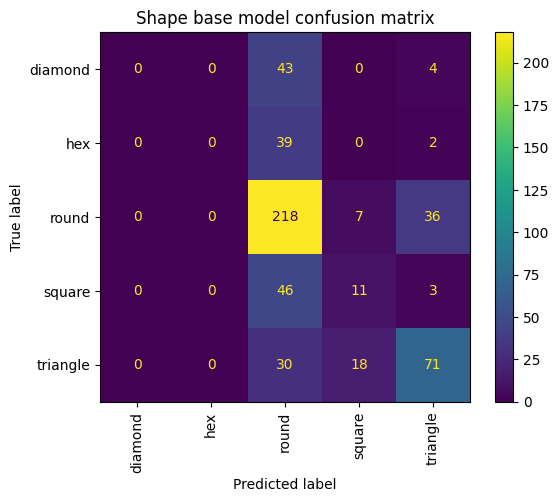

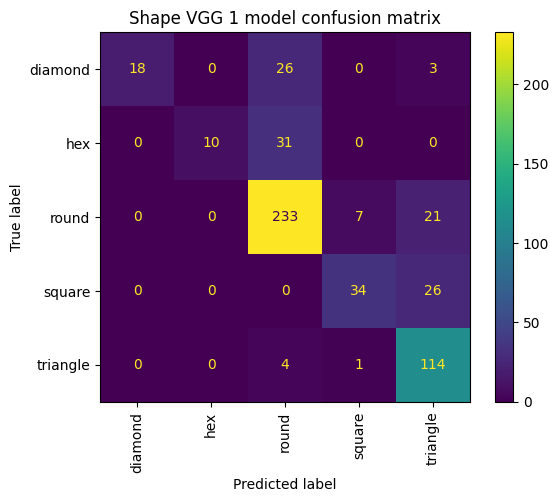

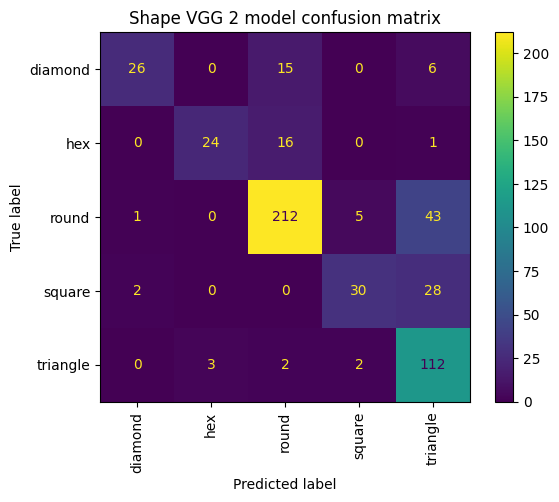

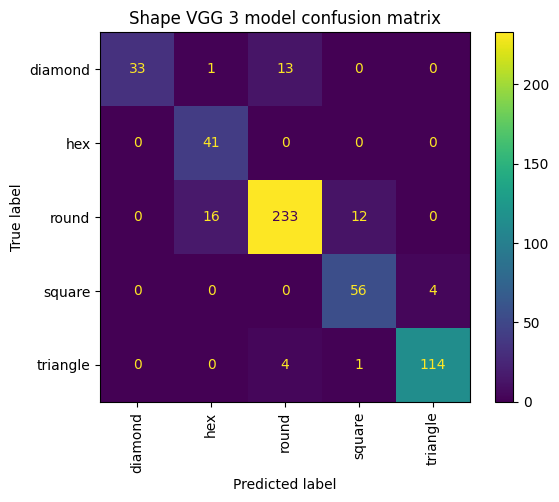

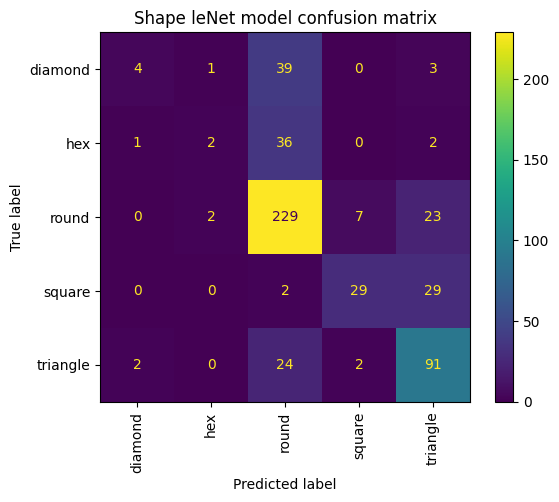

In [ ]:
cm = confusion_matrix(new_data['Shape'], new_data['Shape model'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_namess)
disp.plot()
plt.title("Shape base model confusion matrix")
plt.xticks(rotation = 'vertical')
plt.show()

cm2 = confusion_matrix(new_data['Shape'], new_data['Shape VGG 1 model'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=label_namess)
disp.plot()
plt.title("Shape VGG 1 model confusion matrix")
plt.xticks(rotation = 'vertical')
plt.show()

cm3 = confusion_matrix(new_data['Shape'], new_data['Shape VGG 2 model'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm3, display_labels=label_namess)
disp.plot()
plt.title("Shape VGG 2 model confusion matrix")
plt.xticks(rotation = 'vertical')
plt.show()

cm4 = confusion_matrix(new_data['Shape'], new_data['Shape VGG 3 model'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm4, display_labels=label_namess)
disp.plot()
plt.title("Shape VGG 3 model confusion matrix")
plt.xticks(rotation = 'vertical')
plt.show()

cm5 = confusion_matrix(new_data['Shape'], new_data['Shape leNet model'])

disp = ConfusionMatrixDisplay(confusion_matrix=cm5, display_labels=label_namess)
disp.plot()
plt.title("Shape leNet model confusion matrix")
plt.xticks(rotation = 'vertical')
plt.show()

##SVM

In [21]:
!cp -r /content/drive/'My Drive'/Assignment2_CML/Assignment2_Machine_Learning/Independant_Evaluation .


In [ ]:
!rm -r shapes_dataset_independent_evaluation
os.makedirs("./shapes_dataset_independent_evaluation/")

data_dir_ie="./Independant_Evaluation/"

In [23]:
destination_base_ie = "./shapes_ie/"
if not os.path.exists(destination_base_ie):
    os.makedirs(destination_base_ie)

for shape_ie in os.listdir(data_dir_ie):
    shape_path_ie = os.path.join(data_dir_ie, shape_ie)
    if os.path.isdir(shape_path_ie):
        destination_shape_ie = os.path.join(destination_base_ie, shape_ie)
        if not os.path.exists(destination_shape_ie):
            os.makedirs(destination_shape_ie)
        for type_dir_ie in os.listdir(shape_path_ie):
          type_path_ie = os.path.join(shape_path_ie, type_dir_ie)
          if os.path.isdir(type_path_ie):
                  for image_ie in os.listdir(type_path_ie):
                      image_path_ie = os.path.join(type_path_ie, image_ie)
                      if what(image_path_ie) is not None:
                        shutil.copy(image_path_ie, destination_shape_ie)


In [24]:
Categories_ie=['diamond','hex','round','square','triangle']
flat_data_arr_ie=[]
target_arr_ie=[]
datadir_ie='shapes_ie/'

for i in Categories_ie:
	path_ie=os.path.join(datadir_ie,i)
	for img_ie in os.listdir(path_ie):
		img_array_ie=imread(os.path.join(path_ie,img_ie))
		img_resized_ie=resize(img_array_ie,(28,28,3))
		flat_data_arr_ie.append(img_resized_ie.flatten())
		target_arr_ie.append(Categories_ie.index(i))
flat_data_ie=np.array(flat_data_arr_ie)
target_ie=np.array(target_arr_ie)


In [25]:
df_svm_ie=pd.DataFrame(flat_data_ie)
df_svm_ie['Target']=target_ie
df_svm_ie.shape
print(df_svm_ie)

            0         1         2         3         4         5         6  \
0    0.387584  0.421968  0.515798  0.363933  0.414015  0.527380  0.368184   
1    0.989076  0.979552  0.871429  0.988515  0.977871  0.872829  0.988235   
2    0.998349  0.810184  0.531723  1.000000  0.815289  0.535852  0.999687   
3    0.108300  0.112225  0.109165  0.104363  0.110667  0.109963  0.108663   
4    0.368060  0.368713  0.441722  0.189683  0.233377  0.265734  0.217359   
..        ...       ...       ...       ...       ...       ...       ...   
478  0.996787  1.000000  1.000000  0.998020  1.000000  1.000000  0.963998   
479  0.107422  0.105929  0.098090  0.105960  0.116978  0.111862  0.100462   
480  0.089005  0.082129  0.102606  0.083257  0.076598  0.095250  0.076429   
481  0.445827  0.376561  0.246441  0.533118  0.446886  0.297557  0.479803   
482  0.096211  0.104446  0.107098  0.115846  0.135479  0.165755  0.216557   

            7         8         9  ...      2343      2344      2345  \
0  

In [26]:
destination_base_ie = "./shapes_dataset_independent_evaluation/"
data_dir_ie="./Independant_Evaluation/"

if not os.path.exists(destination_base_ie):
    os.makedirs(destination_base_ie)

for shape_ie in os.listdir(data_dir_ie):
    shape_path_ie = os.path.join(data_dir_ie, shape_ie)
    if os.path.isdir(shape_path_ie):
        destination_shape_ie = os.path.join(destination_base_ie, shape_ie)
        if not os.path.exists(destination_shape_ie):
            os.makedirs(destination_shape_ie)
        for type_dir_ie in os.listdir(shape_path_ie):
          type_path_ie = os.path.join(shape_path_ie, type_dir_ie)
          if os.path.isdir(type_path_ie):
                  for image_ie in os.listdir(type_path_ie):
                      image_path_ie = os.path.join(type_path_ie, image_ie)
                      if what(image_path_ie) is not None:
                        shutil.copy(image_path_ie, destination_shape_ie)


In [27]:
x_ie=df_svm_ie.iloc[:,:-1]
y_ie=df_svm_ie.iloc[:,-1]

In [28]:
y_pred_ie = svc.predict(x_ie)
from sklearn.metrics import accuracy_score

f1_score_svm_ie=f1_score(y_pred_ie,y_ie,average="micro")
f1_score_svm_ie_macro=f1_score(y_pred_ie,y_ie,average="macro")
f1_score_svm_ie_weighted=f1_score(y_pred_ie,y_ie,average="weighted")
print(f1_score_svm_ie)
print(f1_score_svm_ie_macro)
print(f1_score_svm_ie_weighted)

0.650103519668737
0.4854704184704185
0.6651080309154844


In [29]:
print(classification_report(y_ie, y_pred_ie, target_names=['diamond','hex','round','square','triangle'] ))

              precision    recall  f1-score   support

     diamond       0.56      0.49      0.52        47
         hex       1.00      0.22      0.36        41
       round       0.67      0.87      0.75       243
      square       0.11      0.12      0.11        33
    triangle       0.85      0.56      0.68       119

    accuracy                           0.65       483
   macro avg       0.64      0.45      0.49       483
weighted avg       0.69      0.65      0.64       483

